# Google page ranking

https://www.math.arizona.edu/~glickenstein/math443f08/bryanleise.pdf

Naive algorithm of ranking: $$x_1 = 2, x_2 = 1, x_3 = 3, x_4 = 2$$

Page ranking: $$ x_k = \sum_{j \in L_k} x_j / n_j$$

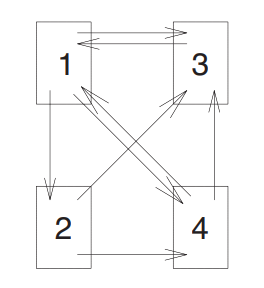

In [ ]:
import numpy as np
web = np.array([[0, 0, 1, 0.5], [1/3, 0, 0, 0], [1/3, 0.5, 0, 0.5], [1/3, 0.5, 0., 0.]])
value, vector = np.linalg.eig(web)
print(value)
eigv = [i.real for i in vector[:,0]]
print(eigv)
eigv = eigv / sum(eigv)
# Ranking of web pages
print(eigv)

[ 1.        +0.j         -0.36062333+0.41097555j -0.36062333-0.41097555j
 -0.27875333+0.j        ]
[0.7210101217513317, 0.24033670725044398, 0.5407575913134985, 0.36050506087566603]
[0.38709677 0.12903226 0.29032258 0.19354839]


In [ ]:
import numpy as np

A = np.array([[100, 1, 0], [60, -1, 1], [15, 0, -1]])
print(A)
b = np.array([800, 475, 100])
print(b)

Ainv = np.linalg.inv(A)

x = np.dot(Ainv, b)
print(x)

[[100   1   0]
 [ 60  -1   1]
 [ 15   0  -1]]
[800 475 100]
[ 7.85714286 14.28571429 17.85714286]


In [ ]:
print(np.linalg.solve(A,b))

[ 7.85714286 14.28571429 17.85714286]


In [2]:
import numpy as np
def seidel(A, b, max_iter = 1000):    
    x = np.zeros(b.shape[0])
    for iter in range(max_iter): 
        # Loop through each row
        for i in range(A.shape[0]):         
            # temp variable d to store b[j] 
            d = b[i]
            #d = b[i] - np.dot(A[i,:],x) + A[i][i]*x[i]
            # Iterate through the columns
            for j in range(A.shape[1]):      
                if(i != j): 
                    d-=A[i][j] * x[j] 
            # updating the value of our solution         
            x[i] = d / A[i][i] 
        
        if np.allclose(np.dot(A, x), b, rtol=1e-8):
            break

    else: # no break
        raise RuntimeError("Insufficient number of iterations")
        
    error = np.dot(A, x) - b
    # returning our updated solution            
    return x, error, iter

A = np.array([[100, 1, 0], [60, -1, 1], [15, 0, -1]])
print(A)
b = np.array([800, 475, 100])

x, error, iter = seidel(A, b)
print("Gauss-Seidel iterations {},\nx: {},\nerror: {}".format(iter, x, error))

[[100   1   0]
 [ 60  -1   1]
 [ 15   0  -1]]
Gauss-Seidel iterations 17,
x: [ 7.8571428  14.28571324 17.85714207],
error: [-6.29043939e-06 -2.89344086e-06  0.00000000e+00]


In [3]:
np.linalg.solve(A, b)

array([ 7.85714286, 14.28571429, 17.85714286])